In [6]:
import pandas as pd
import numpy as np
# import tensorflow as tf
from tensorflow import keras
import keras

import sklearn
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
        GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import label_binarize
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_validate
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split

import scikitplot as skplt


In [2]:
filedata = pd.read_pickle('./output/intermediate-data/filedata-mfccDeltaFeaturesforNN.pkl')

In [3]:
def get_cnn():
    num_filters = [24,32,64,128] 
    pool_size = (2, 2) 
    kernel_size = (3, 3)  
    input_shape = (40, 173, 2)
    num_classes = 10
    keras.backend.clear_session()
    
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, kernel_size, input_shape=input_shape,
                padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))

    model.add(keras.layers.Conv2D(32, kernel_size,
                                  padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))  
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    
    model.add(keras.layers.Conv2D(64, kernel_size,
                                  padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))  
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    
    model.add(keras.layers.Conv2D(128, kernel_size,
                                  padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))  

    model.add(keras.layers.GlobalMaxPooling2D())
    model.add(keras.layers.Dense(256, activation="relu"))
    model.add(keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(optimizer=keras.optimizers.Adam(1e-3), 
        loss=keras.losses.SparseCategoricalCrossentropy(), 
        metrics=["accuracy"])
    return model

In [4]:
# Create a basic model instance
model = get_cnn()

# Loads the weights
model.load_weights('logs/2DMFCCwDelta/best_9.h5')

Accuracy: 0.9931192660550459
Precision: 0.9931192660550459
Recall: 0.9931192660550459
f1_score: 0.9931192660550459
confusion_matrix
[[100   0   0   0   0   0   0   0   0   0]
 [  0  36   0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   2]
 [  0   0   2  98   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0  96   0   0   0   0]
 [  0   0   0   0   0   0  35   0   0   0]
 [  1   0   0   0   0   0   0 118   0   0]
 [  0   0   0   0   0   0   0   0  86   0]
 [  0   0   0   0   0   0   0   0   1  99]]
roc_auc_score: 0.9999733359850967


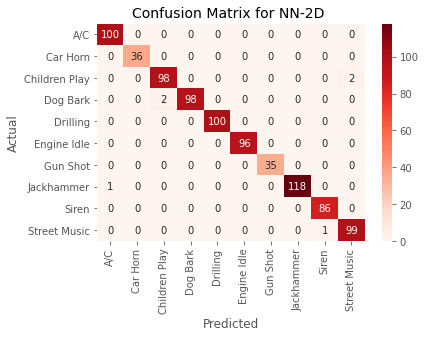

Accuracy: 0.9876126126126126
Precision: 0.9876126126126126
Recall: 0.9876126126126126
f1_score: 0.9876126126126126
confusion_matrix
[[100   0   0   0   0   0   0   0   0   0]
 [  0  42   0   0   0   0   0   0   0   0]
 [  2   0  98   0   0   0   0   0   0   0]
 [  0   0   0  99   0   0   0   0   0   1]
 [  0   0   0   0  95   0   0   5   0   0]
 [  0   0   0   0   0  99   0   0   1   0]
 [  0   0   0   0   0   0  35   0   0   0]
 [  0   0   0   0   0   0   0 120   0   0]
 [  0   0   0   0   0   0   0   0  91   0]
 [  0   1   1   0   0   0   0   0   0  98]]
roc_auc_score: 0.9998717912650662


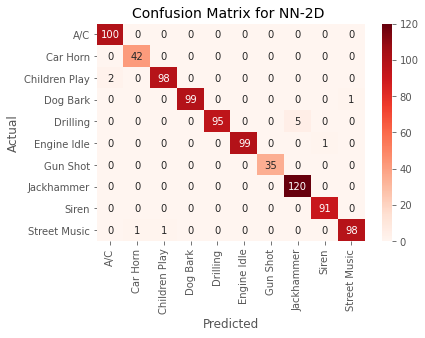

Accuracy: 0.9881081081081081
Precision: 0.9881081081081081
Recall: 0.9881081081081081
f1_score: 0.9881081081081081
confusion_matrix
[[ 99   0   0   0   0   0   0   0   1   0]
 [  0  43   0   0   0   0   0   0   0   0]
 [  0   0  98   2   0   0   0   0   0   0]
 [  0   0   1  97   0   0   0   0   0   2]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0 106   0   1   0   0]
 [  0   0   0   0   0   0  36   0   0   0]
 [  0   0   0   0   0   0   0 120   0   0]
 [  0   0   1   0   0   0   0   0 118   0]
 [  0   0   3   0   0   0   0   0   0  97]]
roc_auc_score: 0.9998091703346568


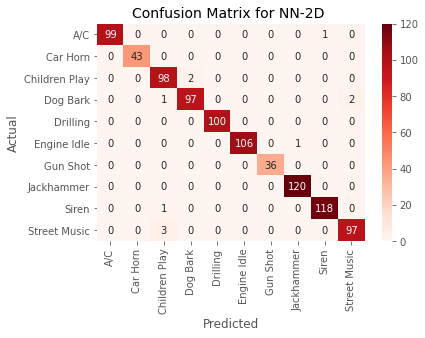

Accuracy: 0.9888888888888889
Precision: 0.9888888888888889
Recall: 0.9888888888888889
f1_score: 0.9888888888888889
confusion_matrix
[[100   0   0   0   0   0   0   0   0   0]
 [  0  58   0   0   1   0   0   0   0   0]
 [  0   0  96   1   0   0   0   0   1   2]
 [  0   0   0  99   1   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0 107   0   0   0   0]
 [  0   0   0   0   0   0  38   0   0   0]
 [  0   0   0   0   0   0   0 119   0   1]
 [  0   0   0   0   0   0   0   0 166   0]
 [  1   0   0   2   0   1   0   0   0  96]]
roc_auc_score: 0.9999308176897393


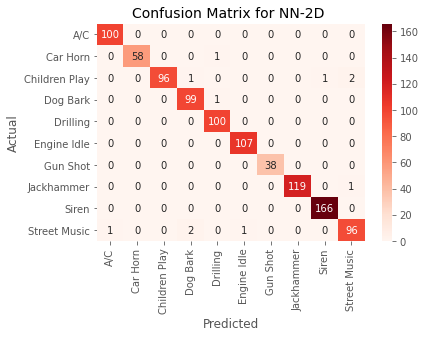

Accuracy: 0.9914529914529915
Precision: 0.9914529914529915
Recall: 0.9914529914529915
f1_score: 0.9914529914529915
confusion_matrix
[[100   0   0   0   0   0   0   0   0   0]
 [  0  97   0   0   0   0   0   0   0   1]
 [  0   0  99   1   0   0   0   0   0   0]
 [  0   0   1  99   0   0   0   0   0   0]
 [  0   0   0   0  99   0   0   1   0   0]
 [  0   0   0   0   1 106   0   0   0   0]
 [  0   0   0   1   0   0  39   0   0   0]
 [  0   0   0   0   1   0   0 119   0   0]
 [  0   0   0   0   0   0   0   0  71   0]
 [  0   0   0   1   0   0   0   0   0  99]]
roc_auc_score: 0.9980956835233649


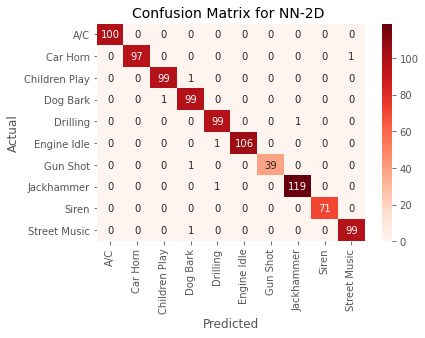

Accuracy: 0.9866342648845686
Precision: 0.9866342648845686
Recall: 0.9866342648845686
f1_score: 0.9866342648845686
confusion_matrix
[[100   0   0   0   0   0   0   0   0   0]
 [  0  28   0   0   0   0   0   0   0   0]
 [  0   0  97   0   0   1   0   0   0   2]
 [  0   0   2  97   0   0   0   1   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   1   0   0 106   0   0   0   0]
 [  0   0   0   0   0   0  46   0   0   0]
 [  1   0   0   0   0   0   0  67   0   0]
 [  0   0   1   0   0   0   0   0  73   0]
 [  1   0   0   0   0   1   0   0   0  98]]
roc_auc_score: 0.9999093769468204


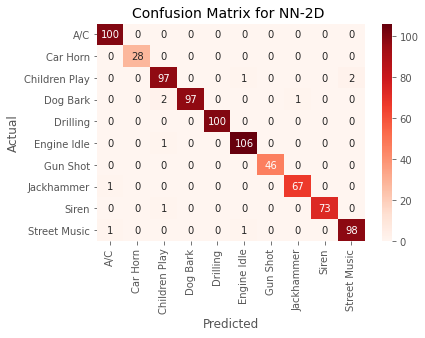

Accuracy: 0.9940334128878282
Precision: 0.9940334128878282
Recall: 0.9940334128878282
f1_score: 0.9940334128878282
confusion_matrix
[[ 99   0   0   0   0   0   0   1   0   0]
 [  0  28   0   0   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0]
 [  0   0   0  99   0   0   0   0   1   0]
 [  0   0   0   0  99   0   0   1   0   0]
 [  0   0   0   0   0 106   0   0   0   0]
 [  0   0   0   0   0   0  51   0   0   0]
 [  0   0   0   0   2   0   0  74   0   0]
 [  0   0   0   0   0   0   0   0  77   0]
 [  0   0   0   0   0   0   0   0   0 100]]
roc_auc_score: 0.9999222525983423


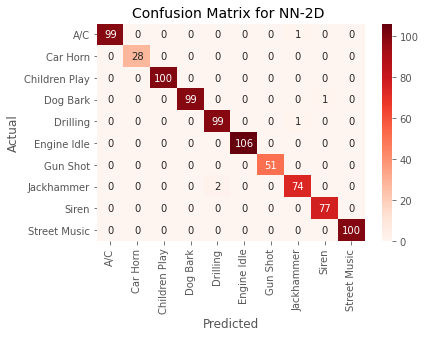

Accuracy: 0.9900744416873449
Precision: 0.9900744416873449
Recall: 0.9900744416873449
f1_score: 0.9900744416873449
confusion_matrix
[[ 97   0   1   0   0   0   0   0   0   2]
 [  0  30   0   0   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0]
 [  0   1   1  98   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0]
 [  0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0  78   0   0]
 [  0   0   0   0   0   1   0   0  79   0]
 [  0   0   2   0   0   0   0   0   0  98]]
roc_auc_score: 0.9994052560920255


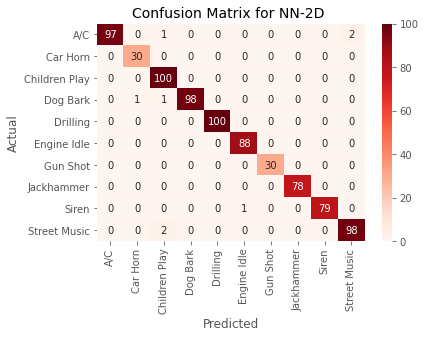

Accuracy: 0.9926470588235294
Precision: 0.9926470588235294
Recall: 0.9926470588235294
f1_score: 0.9926470588235294
confusion_matrix
[[100   0   0   0   0   0   0   0   0   0]
 [  0  32   0   0   0   0   0   0   0   0]
 [  0   0  96   1   0   0   0   0   1   2]
 [  0   0   0  99   0   1   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0  89   0   0   0   0]
 [  0   0   0   1   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0  82   0   0]
 [  0   0   0   0   0   0   0   0  82   0]
 [  0   0   0   0   0   0   0   0   0 100]]
roc_auc_score: 0.9997228459996809


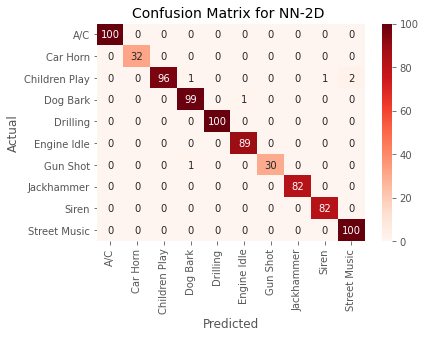

Accuracy: 0.7718040621266428
Precision: 0.7718040621266428
Recall: 0.7718040621266428
f1_score: 0.7718040621266428
confusion_matrix
[[61  0  2  0 14  4  0 12  6  1]
 [ 1 29  0  0  0  0  0  1  0  2]
 [ 1  0 88  7  0  1  0  0  1  2]
 [ 0  0  5 87  3  0  0  0  0  5]
 [ 7  0  4  6 61  0  0 18  3  1]
 [ 9  2  2  4  0 72  0  3  1  0]
 [ 0  0  0  2  0  0 30  0  0  0]
 [ 0  0  1  0 18  1  0 74  1  1]
 [ 2  0 13 10  1  0  0  0 57  0]
 [ 0  0 11  0  1  0  0  0  1 87]]
roc_auc_score: 0.9726338239853163


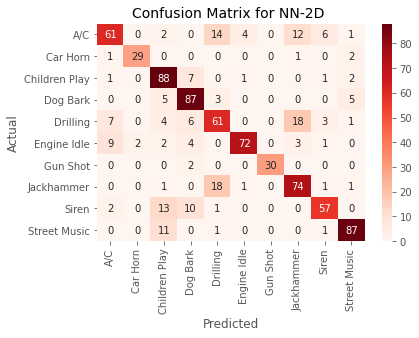

In [10]:
folds = np.array(list(range(1,11)))
kf = KFold(n_splits=10)

df_metrics = pd.DataFrame(columns=['fold', 'accuracy', 'precision', 'recall', 'f1_score', 'confusion_matrix', 'roc_auc_score'])
confusion_matrix_array = []
#print(folds)

for train_index, test_index in kf.split(folds):
    
    traindata = filedata[filedata['fold'].isin(list(folds[train_index]))]
    x_train = np.array(traindata['mfccDelta'].tolist())
    y_train = np.array(traindata['classID'].tolist())

    testdata = filedata[filedata['fold'] == folds[test_index][0]]
    x_test = np.array(testdata['mfccDelta'].tolist())
    y_test = np.array(testdata['classID'].tolist())
    #print(type(y_test))
    #print('y_test: ' + str(y_test))
    
    x_val = np.array(traindata['mfccDelta'].tolist())
    y_val = np.array(traindata['classID'].tolist())
    
    y_predictions = model.predict(x_test)
    class_predictions = np.argmax(y_predictions, axis = 1)
    #print(type(class_predictions))
    #print('class_predictions: ' + str(class_predictions))
    compare_results_array = np.equal(y_test, class_predictions)
    
    accuracy_score = sklearn.metrics.accuracy_score(y_test, class_predictions)
    precision_score = sklearn.metrics.precision_score(y_test, class_predictions, average='micro')
    recall_score = sklearn.metrics.recall_score(y_test, class_predictions, average='micro')
    f1_score = sklearn.metrics.f1_score(y_test, class_predictions, average='micro')
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, class_predictions)
    roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_predictions, multi_class='ovr')
    #fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, class_predictions) #doesn't do multiclass
    
    confusion_matrix_array.append(confusion_matrix)
    
    print("Accuracy: " + str(accuracy_score))
    print("Precision: "+ str(precision_score))
    print("Recall: " + str(recall_score))
    print("f1_score: " + str(f1_score))
    print("confusion_matrix")
    print(confusion_matrix)
    print('roc_auc_score: ' + str(roc_auc_score))
    
    #print("fpr: " + fpr)
    #print("tpr: " + tpr)
    #print("thresholds: " + thresholds)
    
    #generate roc curve
    
    df_metrics = df_metrics.append({
        'fold': test_index[0],
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1_score': f1_score,
        'confusion_matrix': confusion_matrix,
        'roc_auc_score': roc_auc_score
    }, ignore_index=True)
    
    CLASSES = ['A/C', 'Car Horn', 'Children Play', 'Dog Bark',
           'Drilling', 'Engine Idle', 'Gun Shot', 'Jackhammer',
           'Siren', 'Street Music']
    #cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred[i], axis=1))
    cm_df = pd.DataFrame(confusion_matrix, index = CLASSES, columns = CLASSES)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    plt.title('Confusion Matrix for NN-2D ', fontsize=14)
    sns.heatmap(cm_df, annot=True, fmt='.6g', annot_kws={"size": 10}, cmap='Reds')
    plt.show()
    

In [8]:
print(len(traindata['mfccDelta'].tolist()[0]))
print(len(traindata['mfccDelta'].tolist()[0][0]))
print(len(traindata['mfccDelta'].tolist()[0][0][0]))

40
173
2


In [9]:
df_metrics.to_csv('./output/nn-results/nn-2d_results.csv')

In [46]:
combined_matrix = []

#rows
for i in range(0,9):
    combined_row = \
        confusion_matrix_array[0][i] + \
        confusion_matrix_array[1][i] + \
        confusion_matrix_array[2][i] + \
        confusion_matrix_array[3][i] + \
        confusion_matrix_array[4][i] + \
        confusion_matrix_array[5][i] + \
        confusion_matrix_array[6][i] + \
        confusion_matrix_array[7][i] + \
        confusion_matrix_array[8][i] + \
        confusion_matrix_array[9][i] 
    print(combined_row)
    print(type(combined_row))
    combined_matrix.append(combined_row)

[956   0   3   0  14   4   0  13   7   3]
<class 'numpy.ndarray'>
[  1 423   0   0   1   0   0   1   0   3]
<class 'numpy.ndarray'>
[  3   0 970  12   0   2   0   0   3  10]
<class 'numpy.ndarray'>
[  0   1  12 972   4   1   0   1   1   8]
<class 'numpy.ndarray'>
[  7   0   4   6 954   0   0  25   3   1]
<class 'numpy.ndarray'>
[  9   2   3   4   1 975   0   4   2   0]
<class 'numpy.ndarray'>
[  0   0   0   4   0   0 370   0   0   0]
<class 'numpy.ndarray'>
[  2   0   1   0  21   1   0 971   1   2]
<class 'numpy.ndarray'>
[  2   0  15  10   1   1   0   0 900   0]
<class 'numpy.ndarray'>


In [47]:
combined_matrix

[array([956,   0,   3,   0,  14,   4,   0,  13,   7,   3]),
 array([  1, 423,   0,   0,   1,   0,   0,   1,   0,   3]),
 array([  3,   0, 970,  12,   0,   2,   0,   0,   3,  10]),
 array([  0,   1,  12, 972,   4,   1,   0,   1,   1,   8]),
 array([  7,   0,   4,   6, 954,   0,   0,  25,   3,   1]),
 array([  9,   2,   3,   4,   1, 975,   0,   4,   2,   0]),
 array([  0,   0,   0,   4,   0,   0, 370,   0,   0,   0]),
 array([  2,   0,   1,   0,  21,   1,   0, 971,   1,   2]),
 array([  2,   0,  15,  10,   1,   1,   0,   0, 900,   0])]

In [35]:
CLASSES = ['A/C', 'Car Horn', 'Children Play', 'Dog Bark',
           'Drilling', 'Engine Idle', 'Gun Shot', 'Jackhammer',
           'Siren', 'Street Music']
#cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred[i], axis=1))
cm_df = pd.DataFrame(combined_matrix, index = CLASSES, columns = CLASSES)
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
plt.title('Confusion Matrix for NN-2D MFCC+Delta', fontsize=14)
sns.heatmap(cm_df, annot=True, fmt='.6g', annot_kws={"size": 10}, cmap='Reds')
plt.show()

ValueError: Shape of passed values is (9, 10), indices imply (10, 10)

In [37]:
confusion_matrix_array[0][0] + \
        confusion_matrix_array[1][0] + \
        confusion_matrix_array[2][0] + \
        confusion_matrix_array[3][0] + \
        confusion_matrix_array[4][0] + \
        confusion_matrix_array[5][0] + \
        confusion_matrix_array[6][0] + \
        confusion_matrix_array[7][0] + \
        confusion_matrix_array[8][0] + \
        confusion_matrix_array[9][0] 

array([956,   0,   3,   0,  14,   4,   0,  13,   7,   3])

In [43]:


row_0 = confusion_matrix_array[0][0] + confusion_matrix_array[1][0] + confusion_matrix_array[2][0] + confusion_matrix_array[3][0] + confusion_matrix_array[4][0] + confusion_matrix_array[5][0] + confusion_matrix_array[6][0] + confusion_matrix_array[7][0] + confusion_matrix_array[8][0] + confusion_matrix_array[9][0] 
row_1 = confusion_matrix_array[0][1] + confusion_matrix_array[1][1] + confusion_matrix_array[2][1] + confusion_matrix_array[3][1] + confusion_matrix_array[4][1] + confusion_matrix_array[5][1] + confusion_matrix_array[6][1] + confusion_matrix_array[7][1] + confusion_matrix_array[8][1] + confusion_matrix_array[9][1] 
row_2 = confusion_matrix_array[0][2] + confusion_matrix_array[1][2] + confusion_matrix_array[2][2] + confusion_matrix_array[3][2] + confusion_matrix_array[4][2] + confusion_matrix_array[5][2] + confusion_matrix_array[6][2] + confusion_matrix_array[7][2] + confusion_matrix_array[8][2] + confusion_matrix_array[9][2] 
row_3 = confusion_matrix_array[0][3] + confusion_matrix_array[1][3] + confusion_matrix_array[2][3] + confusion_matrix_array[3][3] + confusion_matrix_array[4][3] + confusion_matrix_array[5][3] + confusion_matrix_array[6][3] + confusion_matrix_array[7][3] + confusion_matrix_array[8][3] + confusion_matrix_array[9][3] 
row_4 = confusion_matrix_array[0][4] + confusion_matrix_array[1][4] + confusion_matrix_array[2][4] + confusion_matrix_array[3][4] + confusion_matrix_array[4][4] + confusion_matrix_array[5][4] + confusion_matrix_array[6][4] + confusion_matrix_array[7][4] + confusion_matrix_array[8][4] + confusion_matrix_array[9][4] 
row_5 = confusion_matrix_array[0][5] + confusion_matrix_array[1][9] + confusion_matrix_array[2][9] + confusion_matrix_array[3][9] + confusion_matrix_array[4][9] + confusion_matrix_array[5][9] + confusion_matrix_array[6][9] + confusion_matrix_array[7][9] + confusion_matrix_array[8][9] + confusion_matrix_array[9][9] 
row_6 = confusion_matrix_array[0][9] + confusion_matrix_array[1][9] + confusion_matrix_array[2][9] + confusion_matrix_array[3][9] + confusion_matrix_array[4][9] + confusion_matrix_array[5][9] + confusion_matrix_array[6][9] + confusion_matrix_array[7][9] + confusion_matrix_array[8][9] + confusion_matrix_array[9][9] 
row_7 = confusion_matrix_array[0][9] + confusion_matrix_array[1][9] + confusion_matrix_array[2][9] + confusion_matrix_array[3][9] + confusion_matrix_array[4][9] + confusion_matrix_array[5][9] + confusion_matrix_array[6][9] + confusion_matrix_array[7][9] + confusion_matrix_array[8][9] + confusion_matrix_array[9][9] 
row_8 = confusion_matrix_array[0][9] + confusion_matrix_array[1][9] + confusion_matrix_array[2][9] + confusion_matrix_array[3][9] + confusion_matrix_array[4][9] + confusion_matrix_array[5][9] + confusion_matrix_array[6][9] + confusion_matrix_array[7][9] + confusion_matrix_array[8][9] + confusion_matrix_array[9][9] 
row_9 = confusion_matrix_array[0][9] + confusion_matrix_array[1][9] + confusion_matrix_array[2][9] + confusion_matrix_array[3][9] + confusion_matrix_array[4][9] + confusion_matrix_array[5][9] + confusion_matrix_array[6][9] + confusion_matrix_array[7][9] + confusion_matrix_array[8][9] + confusion_matrix_array[9][9] 

array([  2,   1,  17,   3,   1,   2,   0,   0,   2, 972])

In [52]:
filedata = pd.read_pickle('./output/intermediate-data/filedata-mfccDeltaFeaturesforNN.pkl')

filedata, testdata = train_test_split(filedata, test_size=0.20, random_state=0)

x_test = np.array(testdata['mfccDelta'].tolist())
y_test = np.array(testdata['classID'].tolist())

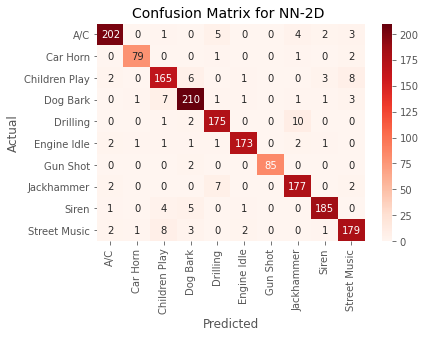

In [62]:
y_predictions = model.predict(x_test)
class_predictions = np.argmax(y_predictions, axis = 1)

df_metrics = pd.DataFrame(columns=['fold', 'accuracy', 'precision', 'recall', 'f1_score', 'confusion_matrix', 'roc_auc_score'])

accuracy_score = sklearn.metrics.accuracy_score(y_test, class_predictions)
precision_score = sklearn.metrics.precision_score(y_test, class_predictions, average='macro')
recall_score = sklearn.metrics.recall_score(y_test, class_predictions, average='macro')
f1_score = sklearn.metrics.f1_score(y_test, class_predictions, average='macro')
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, class_predictions)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_predictions, multi_class='ovr')

df_metrics = df_metrics.append({
        'fold': test_index[0],
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1_score': f1_score,
        'confusion_matrix': confusion_matrix,
        'roc_auc_score': roc_auc_score
    }, ignore_index=True)
    
CLASSES = ['A/C', 'Car Horn', 'Children Play', 'Dog Bark',
       'Drilling', 'Engine Idle', 'Gun Shot', 'Jackhammer',
       'Siren', 'Street Music']
#cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred[i], axis=1))
cm_df = pd.DataFrame(confusion_matrix, index = CLASSES, columns = CLASSES)
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
plt.title('Confusion Matrix for NN-2D ', fontsize=14)
sns.heatmap(cm_df, annot=True, fmt='.6g', annot_kws={"size": 10}, cmap='Reds')
plt.show()

df_metrics.to_csv('./output/nn-results/nn-2d_results_2.csv')

In [60]:
df_metrics

,fold,accuracy,precision,recall,f1_score,confusion_matrix,roc_auc_score
0,9,0.933028,0.938798,0.936495,0.93755,"[[202, 0, 1, 0, 5, 0, 0, 4, 2, 3], [0, 79, 0, ...",0.995667


In [58]:
confusion_matrix[0][0]

202

In [65]:
accuracies_by_class = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
accuracies_by_class

array([0.93087558, 0.95180723, 0.89189189, 0.93333333, 0.93085106,
       0.95054945, 0.97701149, 0.94148936, 0.94387755, 0.91326531])

In [66]:
df_accuracy_by_class = pd.DataFrame(columns=[
    'class',
    'accuracy_score'
])
    
df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - A/C",
    "accuracy_score": accuracies_by_class[0]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Car Horn",
    "accuracy_score": accuracies_by_class[1]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Children Play",
    "accuracy_score": accuracies_by_class[2]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Dog Bark",
    "accuracy_score": accuracies_by_class[3]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Drilling",
    "accuracy_score": accuracies_by_class[4]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Engine Idle",
    "accuracy_score": accuracies_by_class[5]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Gun Shot",
    "accuracy_score": accuracies_by_class[6]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Jackhammer",
    "accuracy_score": accuracies_by_class[7]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Siren",
    "accuracy_score": accuracies_by_class[8]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Street Music",
    "accuracy_score": accuracies_by_class[9]
 }, ignore_index=True)

In [67]:
df_accuracy_by_class

,class,accuracy_score
0,Accuracy - A/C,0.930876
1,Accuracy - Car Horn,0.951807
2,Accuracy - Children Play,0.891892
3,Accuracy - Dog Bark,0.933333
4,Accuracy - Drilling,0.930851
5,Accuracy - Engine Idle,0.950549
6,Accuracy - Gun Shot,0.977011
7,Accuracy - Jackhammer,0.941489
8,Accuracy - Siren,0.943878
9,Accuracy - Street Music,0.913265


In [68]:
df_accuracy_by_class.to_csv('./output/nn-results/nn-2d_class_accuracies.csv')